## Bollinger Bands
Bollinger Bands are a volatility-based analysis tool they consist of moving average and two bands(upper and lower) that widen and narrow based on price volatility.

### What does Bollinger Bands indicate?
| Signal                   | Interepretation                               |
|--------------------------|-----------------------------------------------|
| Price near upper band    | Overbought or high volatility (sell signal)   |
| Price near lower band    | Oversold or high volatility (buy signal)      |
| Bands widening           | Increasing volatility (breakout coming)       |
| Bands contracting        | Decreasing volatility (consolidation)         |
| Price breaks upper/lower | Potential trend continuation or reversal zone |

### Calculation and structure
Given time series(closing prices):
1. Middle Band $\rightarrow$ Moving average (usually 20 day simple moving avg)
$Middle Band = SMA_{\text{20 days}}(Close)$
2. Upper Band $\rightarrow$
$Upper Band = Middle Band + (k \times Standard Deviation)$
3. Lower Bans $\rightarrow$
$Lower Band = Middle Band - (k \times Standard Deviation)$

Note: $k$ is usually 2


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\devpa\AppData\Local\Temp\ipykernel_2836\620674380.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=tickers, period='max')
[*********************100%***********************]  1 of 1 completed


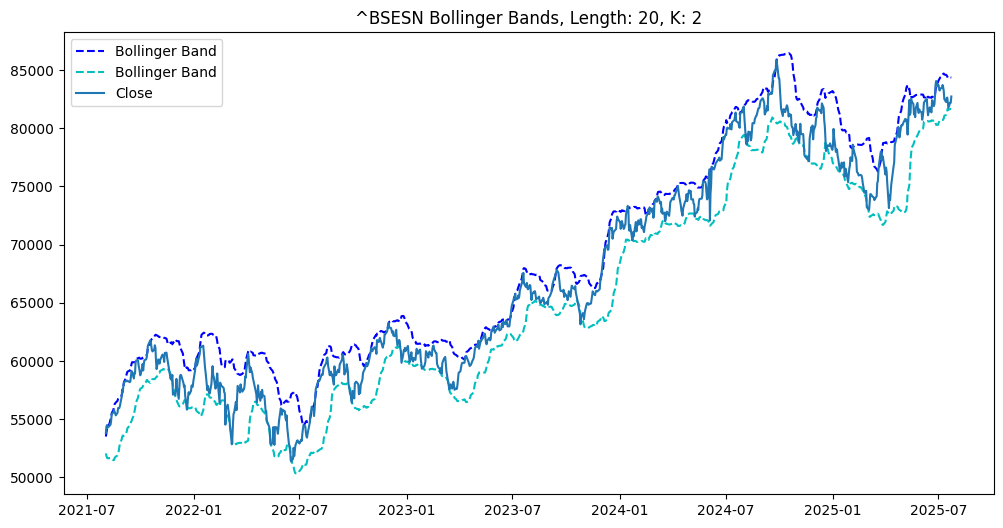

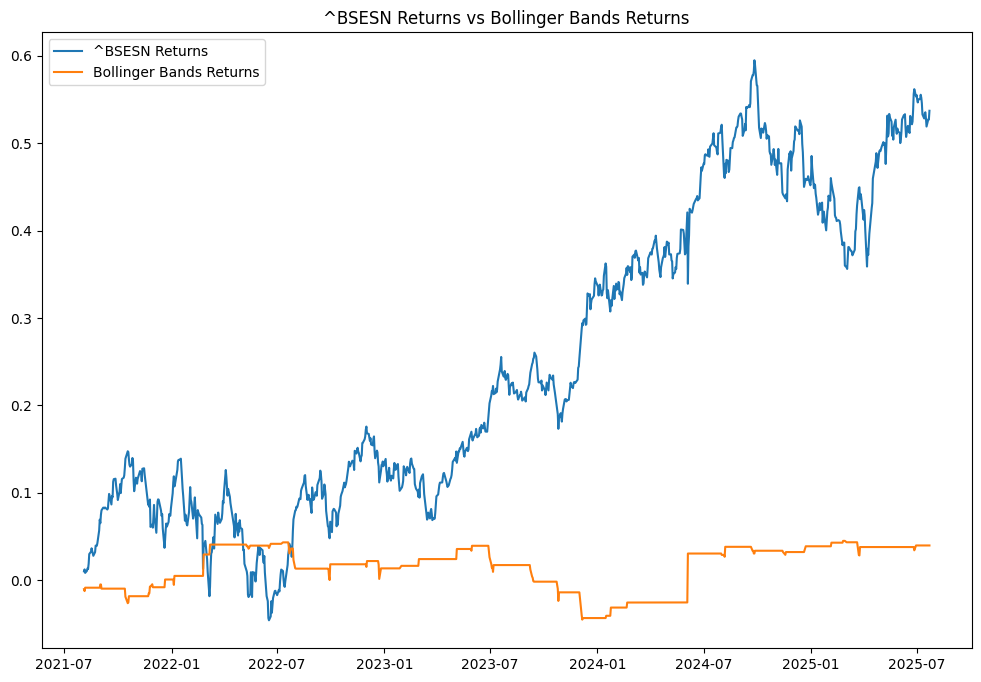

In [59]:
TICKER = '^BSESN'
BB_LENGTH = 20
K = 2
LOOKBACK = 1000

def get_data(tickers=TICKER):
    df = yf.download(tickers=tickers, period='max')
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_bollinger_bands(df, k=K, bb_len=BB_LENGTH):
    # middle band
    df['BB_SMA'] = df["Close"].rolling(bb_len).mean()
    # get standard deviation of close price for the period
    df["BB_STDV"] = df["Close"].rolling(bb_len).std()

    df["Upper_Band"] = df["BB_SMA"] + (k * df["BB_STDV"])
    df["Lower_Band"] = df["BB_SMA"] - (k * df["BB_STDV"])
    df.dropna(inplace=True)
    plt.figure(figsize=(12,6))
    plt.title(f"{TICKER} Bollinger Bands, Length: {bb_len}, K: {k}")
    plt.plot(df["Upper_Band"], color='b', linestyle='--', label="Bollinger Band")
    plt.plot(df["Lower_Band"], color='c', linestyle='--', label="Bollinger Band")
    plt.plot(df["Close"], label="Close")
    plt.legend()
    return df

# if close_price > upper band(sell signal); if close_price < lower_band(buy signal) if in between do nothing
def add_strategy(df):
    df["Strategy"] = 0
    df["Strategy"] = np.where(df["Close"] > df["Upper_Band"], -1,
                              np.where(df["Close"] < df["Lower_Band"], 1, 0))
    # shift by 1 to avoid lookahead
    df["Strategy"] = df["Strategy"].shift(1)
    return df

def test_strategy(df):
    df["Asset Returns"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy Returns"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    plt.figure(figsize = (12, 8))
    plt.plot(df["Asset Returns"], label=f"{TICKER} Returns")
    plt.plot(df["Strategy Returns"], label=f"Bollinger Bands Returns")
    plt.title(f"{TICKER} Returns vs Bollinger Bands Returns")
    plt.legend();
    return df


def main():
    df = get_data(TICKER)
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

df = main()

In [10]:
df

Price,Close,High,Low,Open,Volume,BB_SMA,BB_STDV,Upper_Band,Lower_Band
Date,,,,,,,,,
2025-03-27,565.408508,569.217256,563.274801,565.508189,42164200,566.349530,10.359933,587.069396,545.629664
2025-03-28,554.022156,564.600929,553.433929,563.863120,71662700,564.518048,8.983944,582.485936,546.550161
2025-03-31,557.741150,559.057266,545.258035,548.209332,95328200,563.389923,8.286963,579.963850,546.815996
2025-04-01,559.316467,561.280692,552.047977,555.806884,54609600,562.684015,7.981994,578.648002,546.720028
2025-04-02,562.856079,565.747495,553.174678,553.413961,76014500,561.846927,6.922389,575.691706,548.002148
...,...,...,...,...,...,...,...,...,...
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,616.290454,10.304747,636.899949,595.680959
2025-07-18,627.580017,629.469971,626.460022,629.299988,65621600,617.885504,9.373276,636.632056,599.138952
2025-07-21,628.770020,631.539978,628.340027,628.770020,63375000,619.610004,7.850860,635.311723,603.908284
